In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
import sys

import os

def relpath(path):
    try:
        dirname = os.path.dirname(__file__)
    except:
        return '/home/benjamin/Nextcloud/Work/W_PhD/W_PhD_Git/PhD_Git/PhD_Thesis/notebooks/md_sim'
    return os.path.join(dirname, path)

matplotlib.rcParams['figure.figsize'] = [8, 6]
matplotlib.rc('text', usetex = True)

sns.set_palette('dark')


sys.path.append(relpath("../../src/md_sim"))
sys.path.append("../../src/md_sim")
sys.path.append("../../src/diamond_analysis")

from load_lammps_log import load_thermo
from PET_Hugoniot import us_to_P, us_to_T

In [2]:
def get_attr(attr, grid, temp, time):
    dfs, dt, n_atoms, run_steps = load_thermo(f'/media/benjamin/BenDrive/Nextcloud/Work/W_PhD/W_PhD_Analysis/Simulations/LAMMPS/strain_expansion/edip/grid_{grid}/{temp}K_8x8x8_{time}ns.log')
    equilib_df         =   dfs[0].iloc[:]
    release_df         =   dfs[1].iloc[:]
    return equilib_df['Step'], equilib_df[attr]

In [3]:
def pressure(grid,temp,state='equilibration'):
    dfs, dt, n_atoms, run_steps = load_thermo(f'/media/benjamin/BenDrive/Nextcloud/Work/W_PhD/W_PhD_Analysis/Simulations/LAMMPS/strain_expansion/edip/grid_{grid}/{temp}K_8x8x8_100ns.log')
    equilib_df         =   dfs[0].iloc[:]
    release_df         =   dfs[1].iloc[:]
    if state=='equilibration':
        pressure           = int(np.mean(equilib_df['Press'].values[-200:]*1e-4))
        print(f"Grid: {grid}, Temp: {temp} : {pressure} GPa")
        return pressure
    elif state=='expansion':
        pressure           = int(np.mean(release_df['Press'].values[-200:]*1e-4))
        temperature        = int(np.mean(release_df['Temp'].values[-200:]))
        return pressure, temperature

In [4]:
Hug_PET     =   np.loadtxt('../../.data_LW03/Hugoniot_PET/hugoniot_mylar_dftmd.txt',skiprows=11)
Hug_PET     =   Hug_PET[:-60]
Hug_PET.shape

(40, 5)

FileNotFoundError: [Errno 2] No such file or directory: '/media/benjamin/BenDrive/Nextcloud/Work/W_PhD/W_PhD_Analysis/Simulations/LAMMPS/strain_expansion/edip/grid_3_40/2000K_8x8x8_100ns.log'

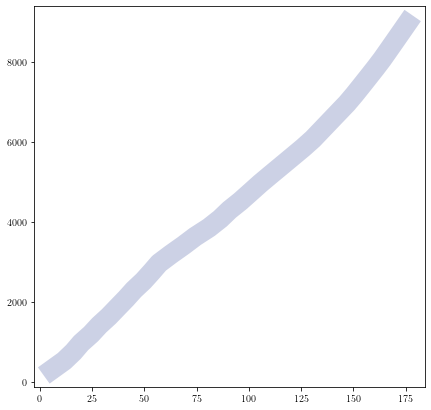

In [5]:
fig, ax             =   plt.subplots(figsize=(7,7))

ax.plot(Hug_PET[:,4]*100,Hug_PET[:,2],label="PET Hugoniot",linewidth=20,alpha=0.2)

temp        =  2000
P,T         = pressure("3_40",str(temp),state='expansion')
plt.plot([pressure("3_40",str(temp)),P],[temp,T],linestyle='dashed',c='k')
ax.scatter(pressure("3_40",str(temp)),temp,marker="*",s=250,c='gold')
ax.scatter(P,T,marker="*",s=250,c='gold')

temp        =  3000
P,T         = pressure("3_40",str(temp),state='expansion')
plt.plot([pressure("3_40",str(temp)),P],[temp,T],linestyle='dashed',c='k')
ax.scatter(pressure("3_40",str(temp)),temp,marker="*",s=250,c='k')
ax.scatter(P,T,marker="*",s=250,c='k')

temp        =  4000
P,T         = pressure("3_35",str(temp),state='expansion')
plt.plot([pressure("3_35",str(temp)),P],[temp,T],linestyle='dashed',c='k')
ax.scatter(pressure("3_35",str(temp)),temp,marker="*",s=250,c='pink')
ax.scatter(P,T,marker="*",s=250,c='pink')

temp        =  5000
P,T         = pressure("3_35",str(temp),state='expansion')
plt.plot([pressure("3_35",str(temp)),P],[temp,T],linestyle='dashed',c='k')
ax.scatter(pressure("3_35",str(temp)),temp,marker="*",s=250,c='darkred')
ax.scatter(P,T,marker="*",s=250,c='darkred')

ax.set_xlabel(r"Pressure [GPa]",fontsize=30)
ax.set_ylabel(r"Temperature [K]",fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=20)
plt.tight_layout()
plt.savefig((f'../../../../../W_PhD_Conferences/DocSeminar/MD_sim.svg'),dpi=1200)

80.42431530167099 3834.9859206558654 darkgreen
89.31150424752178 4224.586991697847 darkgreen
84.40251624752618 3995.243510264643 darkgreen
88.72103138695837 4194.936747469207 darkgreen
86.3908857974233 4077.929869706728 darkgreen
139.28274588584907 6544.471363655243 darkred
138.03033955565917 6475.951852067577 darkred
116.41982350586659 5437.009561671771 darkgreen
64.22826174020074 3241.5047310680307 darkgreen
34.95504466937055 1734.8788861635637 darkred


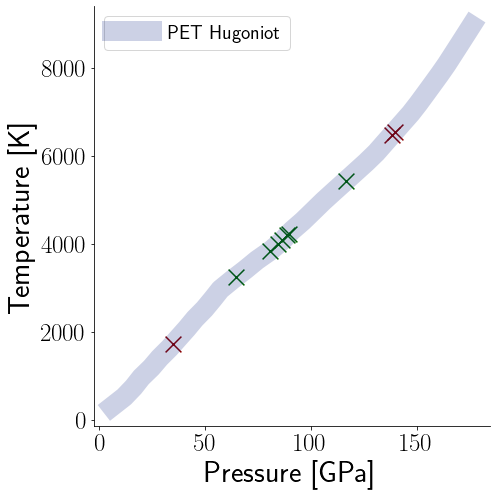

In [ ]:
LW03_shots          =   np.loadtxt('../../.data_LW03/Hugoniot_PET/LW03_diamond.csv',skiprows=1,delimiter=',')
color_dict          =   {1 : "darkgreen", 0 : "darkred"}

fig, ax             =   plt.subplots(figsize=(7,7))

ax.plot(Hug_PET[:,4]*100,Hug_PET[:,2],label="PET Hugoniot",linewidth=20,alpha=0.2)
for shot in LW03_shots:
    ax.scatter(us_to_P(shot[0]), us_to_T(shot[0]), c=color_dict[int(shot[1])],marker='x',s=250)

ax.set_xlabel(r"Pressure [GPa]",fontsize=30)
ax.set_ylabel(r"Temperature [K]",fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=20)
plt.tight_layout()
plt.savefig((f'../../../../../W_PhD_Conferences/DocSeminar/MD_sim.svg'),dpi=1200)

In [11]:
dd

array([[ 10.42390549,   1.        ,  78.        ],
       [ 10.89918256,   1.        , 182.        ],
       [ 10.64395955,   1.        , 186.        ],
       [ 10.86956522,   1.        , 188.        ],
       [ 10.75268817,   1.        , 190.        ],
       [ 13.17523057,   0.        , 279.        ],
       [ 13.12335958,   0.        , 282.        ],
       [ 12.20256254,   1.        , 286.        ],
       [  9.48766603,   1.        , 289.        ],
       [  7.4682599 ,   0.        , 298.        ]])